# Iris Data Set Project
Author: Myles Henehan<br/>Student Number: G00439446<br/>Module: Programming and Scripting

## Background of the Iris Data Set

First introduced in 1936 by British statistician Ronald Fisher in his paper titled "The use of multiple measurements in taxonomic problems," the Iris Data set is a staple in the field of machine learning and statistics, and serves as a simple, straightforward source of data through which beginners in the field of data analytics can build up their knowledge.

The data set contains 150 instances, split evenly between 3 different types (otherwise known as classes) of Iris flower. These types are setosa, versicolor, and virginica. Moreover, each flower has 4 different features (known as variables): sepal length, sepal width, petal length and petal width. This combination of classes and variables gives students in the field of data science a simple yet all-encompassing set of data through which to explore data representation using Python.

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Overview

In [2]:
file = 'iris/iris.data'
df = pd.read_csv(file, header=None)
print(df)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


Since the dataset doesn't have headers, we will assign each data series to the right variables, using the information in the iris.names file for reference

In [4]:
sepallen = df[0]
sepalwidth = df[1]
petallen = df[2]
petalwidth = df[3]
species = df[4]

variables = {sepallen, sepalwidth, petallen, petalwidth}

## Variable Types

In [44]:
sepallendescription = sepallen.describe()
sepalwidthdescription = sepalwidth.describe()
petallendescription = petallen.describe()
petalwidthdescription = petalwidth.describe()

with open('Irisvariabledescriptions.txt', 'w') as ivd:
    ivd.write("Here is the description of the sepal length variable:\n")
    ivd.write(sepallendescription.to_string() + "\n\n")

    ivd.write("Here is the description of the sepal width variable:\n")
    ivd.write(sepalwidthdescription.to_string() + "\n\n")

    ivd.write("Here is the description of the petal length variable:\n")
    ivd.write(petallendescription.to_string() + "\n\n")

    ivd.write("Here is the description of the petal width variable:\n")
    ivd.write(petalwidthdescription.to_string() + "\n\n")

## Histograms

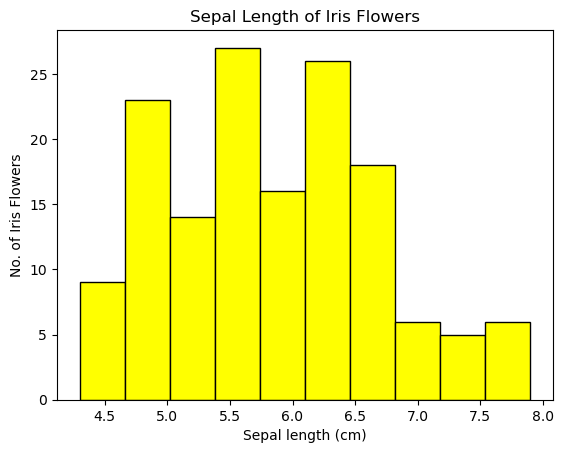

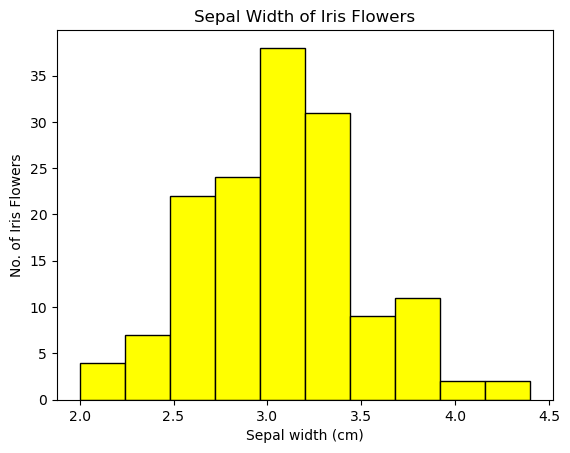

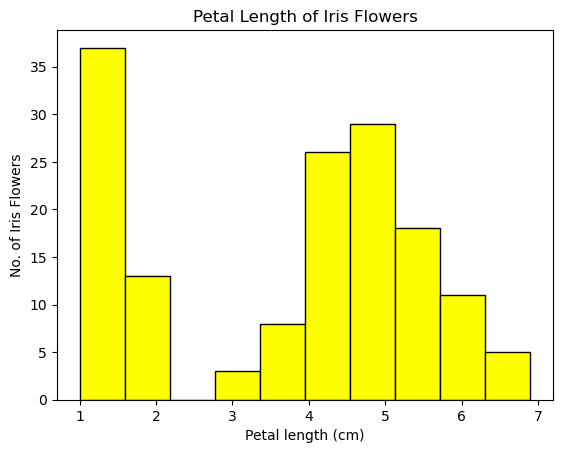

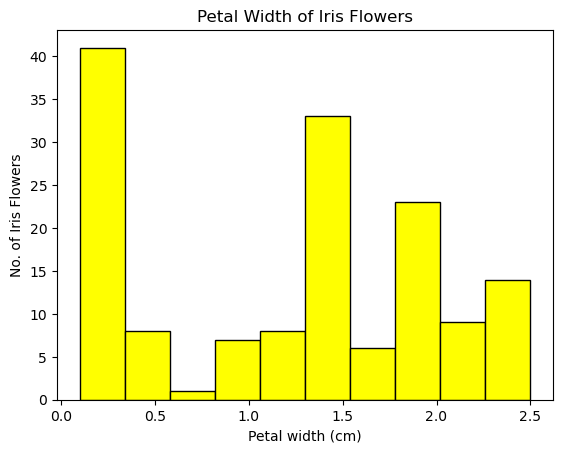

In [19]:
from irisfunctions import irisdatahist

#Sepal Length
irisdatahist(sepallen, 'Sepal length (cm)', 'Sepal Length of Iris Flowers', 'sepallen_histogram.png')

# Sepal Width
irisdatahist(sepalwidth, 'Sepal width (cm)', 'Sepal Width of Iris Flowers', 'sepalwidth_histogram.png')

# Petal Length
irisdatahist(petallen, 'Petal length (cm)', 'Petal Length of Iris Flowers', 'petallen_histogram.png')

# Petal Width
irisdatahist(petalwidth, 'Petal width (cm)', 'Petal Width of Iris Flowers', 'petalwidth_histogram.png')

## Conclusion

## References

Fisher,R. A.. (1988). Iris. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.